In [1]:
import sys, os, torch
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

if(torch.cuda.device_count() >= 1):
    device = "cuda:0"
else:
    device = 'cpu'

# move directory
os.chdir("..")

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

,model,F1-score,AUC,Precision,Recall,Prediction-time
0,DilatedTCN,0.86,0.884,0.98,0.77,10.0ms
1,DilatedTCN,0.80,0.862,0.90,0.73,20.0ms
2,DilatedTCN,0.74,0.833,0.83,0.67,30.0ms
3,DilatedTCN,0.72,0.810,0.84,0.63,40.0ms
4,DilatedTCN,0.68,0.792,0.78,0.60,50.0ms
5,Bayesian-DilatedTCN,0.85,0.890,0.94,0.78,10.0ms
6,Bayesian-DilatedTCN,0.78,0.852,0.87,0.71,20.0ms
7,Bayesian-DilatedTCN,0.74,0.825,0.86,0.66,30.0ms
8,Bayesian-DilatedTCN,0.71,0.800,0.85,0.61,40.0ms
9,Bayesian-DilatedTCN,0.66,0.775,0.78,0.57,50.0ms


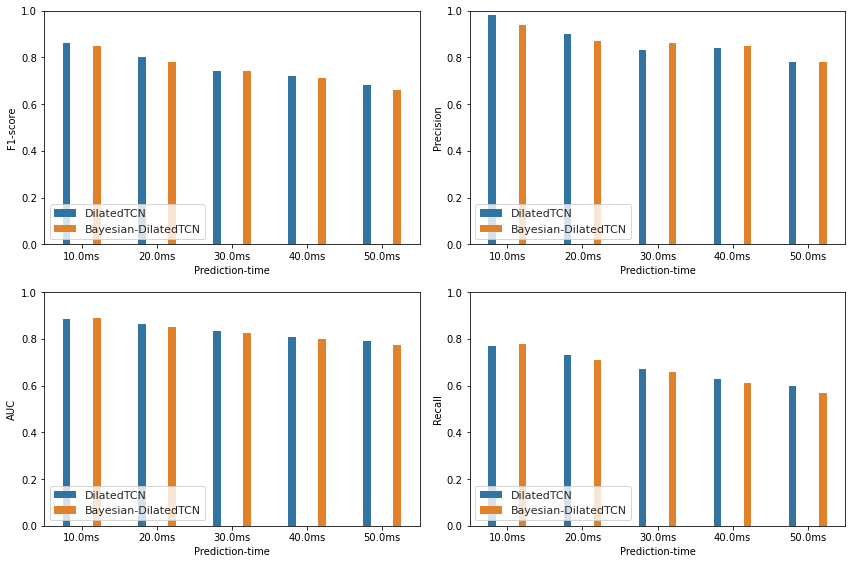

In [3]:
model_list = ['DilatedTCN']*5+['Bayesian-DilatedTCN']*5
dist_list = ["{:.1f}ms".format(10.0 * i) for i in [1,2,3,4,5]] * 2 
f1_list = [0.86, 0.80, 0.74, 0.72, 0.68] + [0.85, 0.78, 0.74, 0.71, 0.66]
auc_list = [0.884, 0.862, 0.833, 0.81, 0.792] + [0.89, 0.852, 0.825, 0.80, 0.775]
dis_pre_list = [0.98, 0.90, 0.83, 0.84, 0.78] + [0.94, 0.87, 0.86, 0.85, 0.78]
dis_rec_list = [0.77,0.73, 0.67, 0.63, 0.60] + [0.78, 0.71, 0.66, 0.61, 0.57]

df_exp_algorithm = pd.DataFrame({
    "model":model_list,
    "F1-score":f1_list,
    "AUC":auc_list,
    "Precision":dis_pre_list,
    "Recall":dis_rec_list,
    "Prediction-time":dist_list
})

fig, axes = plt.subplots(2,2, sharex = False, figsize = (12, 8))
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'F1-score', hue = 'model', ax = axes[0,0])
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'AUC', hue = 'model', ax = axes[1,0])
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Precision', hue = 'model', ax = axes[0,1])
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Recall', hue = 'model', ax = axes[1,1])

sns.set_theme(style="whitegrid") ## figure, axes 스타일
width = 0.1

for i in range(0,4):
    for bar in axes.ravel()[i].patches:
        x = bar.get_x() # 막대 좌측 하단 x 좌표
        old_width = bar.get_width() # 기존 막대 폭
        bar.set_width(width) # 폭변경
        bar.set_x(x+(old_width-width)/2) # 막대 좌측 하단 x 좌표 업데이트
        
    axes.ravel()[i].legend(loc='lower left')
    axes.ravel()[i].set_ylim([0,1.0])
    
fig.tight_layout()

df_exp_algorithm.groupby(by="model").apply(lambda x : x[:])

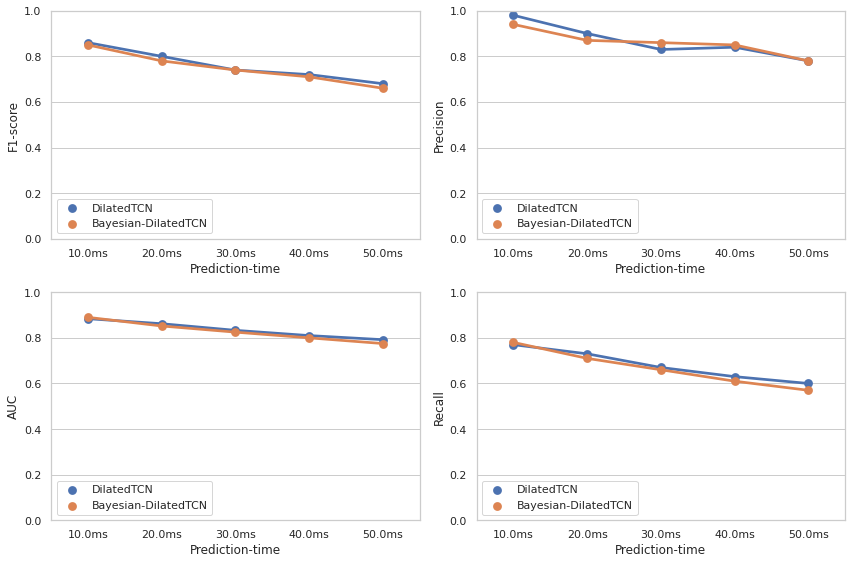

In [4]:
fig, axes = plt.subplots(2,2, sharex = False, figsize = (12, 8))
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'F1-score', hue = 'model', ax = axes[0,0])
axes[0,0].legend(loc='lower left')
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'AUC', hue = 'model', ax = axes[1,0])
axes[1,0].legend(loc='lower left')
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Precision', hue = 'model', ax = axes[0,1], )
axes[0,1].legend(loc='lower left')
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Recall', hue = 'model', ax = axes[1,1])
axes[1,1].legend(loc='lower left')

axes[0,0].set_ylim([0,1.0])
axes[1,0].set_ylim([0,1.0])
axes[0,1].set_ylim([0,1.0])
axes[1,1].set_ylim([0,1.0])
fig.tight_layout()

In [5]:
["{:.3f}ms".format(4.76 * 4 * i) for i in [1,2,3,4,5]]

['19.040ms', '38.080ms', '57.120ms', '76.160ms', '95.200ms']

,model,F1-score,AUC,Precision,Recall,Prediction-time
0,Transformer,0.70,0.885,0.640,0.78,20.0ms
1,Transformer,0.76,0.831,0.880,0.67,40.0ms
2,Transformer,0.73,0.837,0.780,0.69,60.0ms
3,Transformer,0.67,0.800,0.740,0.62,80.0ms
4,Transformer,0.65,0.761,0.840,0.53,100.0ms
5,CnnLSTM,0.72,0.805,0.860,0.61,20.0ms
6,CnnLSTM,0.83,0.855,0.990,0.71,40.0ms
7,CnnLSTM,0.72,0.782,0.980,0.57,60.0ms
8,CnnLSTM,0.65,0.804,0.670,0.64,80.0ms
9,CnnLSTM,0.63,0.791,0.630,0.62,100.0ms


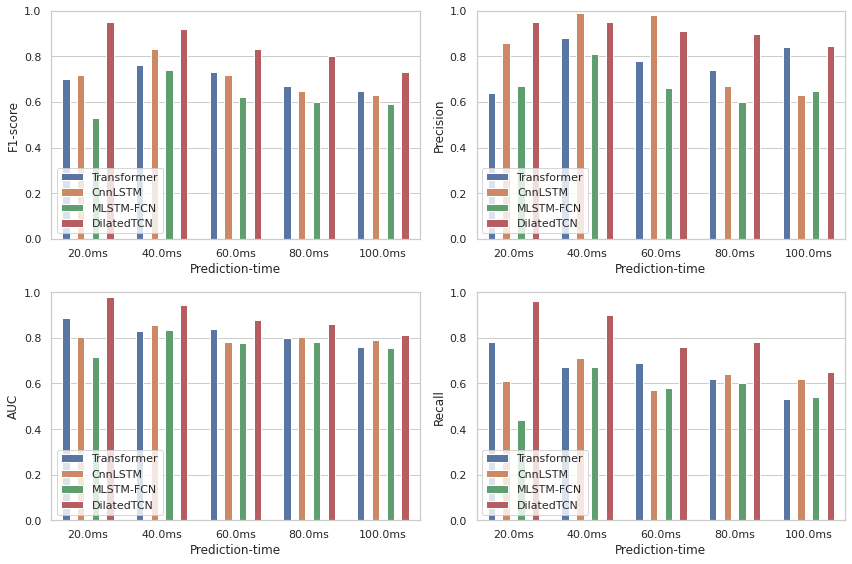

In [6]:
# Graph for publishing paper : Model comparison for 0D data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# comparison between previous research and current research
model_list = ['Transformer']*5+['CnnLSTM']*5 + ['MLSTM-FCN']*5 + ['DilatedTCN']*5
dist_list = ["{:.1f}ms".format(10 * i) for i in [2, 4, 6, 8, 10]] * 4
f1_list = [0.70,0.76,0.73,0.67,0.65] + [0.72, 0.83, 0.72, 0.65, 0.63] + [0.53,0.74,0.62,0.60,0.59] + [0.95, 0.92, 0.83, 0.80, 0.73]
auc_list = [0.885,0.831,0.837,0.80,0.761] + [0.805,0.855,0.782,0.804,0.791] + [0.716, 0.833,0.778,0.780,0.755] + [0.977, 0.946, 0.877, 0.86, 0.814]
dis_pre_list = [0.64,0.88,0.78,0.74,0.84] + [0.86,0.99,0.98,0.67,0.63] + [0.67,0.81,0.66,0.60,0.65] + [0.95, 0.95, 0.91,0.90, 0.845]
dis_rec_list = [0.78,0.67,0.69,0.62,0.53] + [0.61,0.71,0.57,0.64,0.62] + [0.44,0.67,0.58,0.60,0.54] + [0.96, 0.90, 0.76,0.78, 0.65]

df_exp_algorithm = pd.DataFrame({
    "model":model_list,
    "F1-score":f1_list,
    "AUC":auc_list,
    "Precision":dis_pre_list,
    "Recall":dis_rec_list,
    "Prediction-time":dist_list
})

fig, axes = plt.subplots(2,2, sharex = False, figsize = (12, 8))
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'F1-score', hue = 'model', ax = axes[0,0])
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'AUC', hue = 'model', ax = axes[1,0])
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Precision', hue = 'model', ax = axes[0,1])
sns.barplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Recall', hue = 'model', ax = axes[1,1])

sns.set_theme(style="whitegrid") ## figure, axes 스타일
width = 0.1

for i in range(0,4):
    for bar in axes.ravel()[i].patches:
        x = bar.get_x() # 막대 좌측 하단 x 좌표
        old_width = bar.get_width() # 기존 막대 폭
        bar.set_width(width) # 폭변경
        bar.set_x(x+(old_width-width)/2) # 막대 좌측 하단 x 좌표 업데이트
        
    axes.ravel()[i].legend(loc='lower left')
    axes.ravel()[i].set_ylim([0,1.0])
    
fig.tight_layout()

df_exp_algorithm.groupby(by="model").apply(lambda x : x[:])

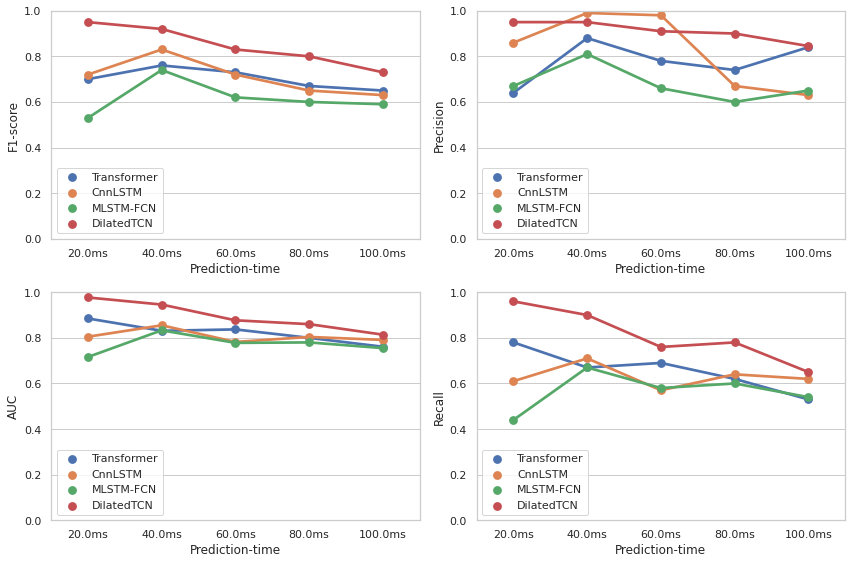

In [7]:
fig, axes = plt.subplots(2,2, sharex = False, figsize = (12, 8))
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'F1-score', hue = 'model', ax = axes[0,0])
axes[0,0].legend(loc='lower left')
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'AUC', hue = 'model', ax = axes[1,0])
axes[1,0].legend(loc='lower left')
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Precision', hue = 'model', ax = axes[0,1], )
axes[0,1].legend(loc='lower left')
sns.pointplot(data = df_exp_algorithm, x = 'Prediction-time', y = 'Recall', hue = 'model', ax = axes[1,1])
axes[1,1].legend(loc='lower left')

axes[0,0].set_ylim([0,1.0])
axes[1,0].set_ylim([0,1.0])
axes[0,1].set_ylim([0,1.0])
axes[1,1].set_ylim([0,1.0])
fig.tight_layout()

In [8]:
# uncertainty analysis
result = pd.read_pickle("./results/analysis_uncertainty.pkl")

In [9]:
result['au-disrupt'] = result['au'].apply(lambda x : x[0])
result['eu-disrupt'] = result['eu'].apply(lambda x : x[0])

result['au-normal'] = result['au'].apply(lambda x : x[1])
result['eu-normal'] = result['eu'].apply(lambda x : x[1])
result['cases'] = result['cases'].apply(lambda x : 'FN' if x == 'TN' else x)

In [10]:
result.head()

,au,eu,preds,shot,cases,au-disrupt,eu-disrupt,au-normal,eu-normal
0,"[0.20298952, 0.23611493]","[0.0010219502, 0.0010219502]","[[0.5637839, 0.43621612], [0.5856193, 0.414380...",31485,TP,0.202990,0.001022,0.236115,0.001022
1,"[0.029557467, 0.021989318]","[1.9731953e-05, 1.9731924e-05]","[[0.96619684, 0.033803128], [0.972716, 0.02728...",25794,TP,0.029557,0.000020,0.021989,0.000020
2,"[0.0343201, 0.03719896]","[3.352394e-05, 3.3523906e-05]","[[0.05126544, 0.9487346], [0.04323334, 0.95676...",30094,FN,0.034320,0.000034,0.037199,0.000034
3,"[0.08488792, 0.08543028]","[0.00014374145, 0.00014374137]","[[0.9115305, 0.08846948], [0.9121906, 0.087809...",29418,TP,0.084888,0.000144,0.085430,0.000144
4,"[0.1279545, 0.09273821]","[0.00019608479, 0.00019608461]","[[0.12424717, 0.87575287], [0.1305197, 0.86948...",31491,FN,0.127954,0.000196,0.092738,0.000196


<AxesSubplot:xlabel='au-disrupt', ylabel='Count'>

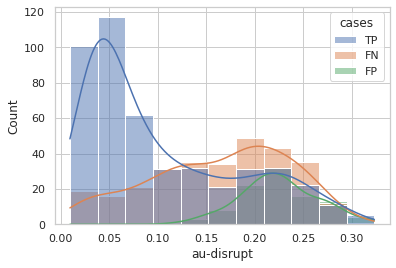

In [11]:
sns.histplot(data = result, x = 'au-disrupt', hue = 'cases', kde = True)

<AxesSubplot:xlabel='au-normal', ylabel='Count'>

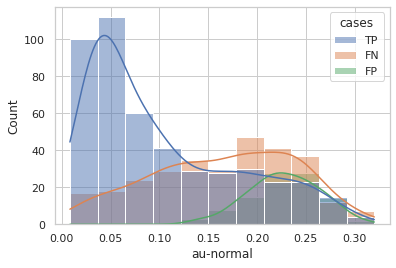

In [12]:
sns.histplot(data = result, x = 'au-normal', hue = 'cases', kde = True)

<AxesSubplot:xlabel='eu-disrupt', ylabel='Count'>

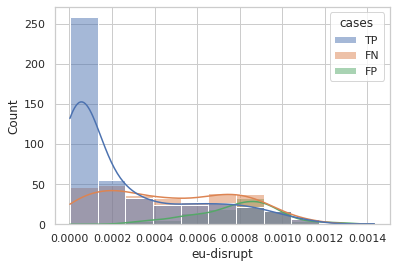

In [13]:
sns.histplot(data = result, x = 'eu-disrupt', hue = 'cases', kde = True)

<AxesSubplot:xlabel='eu-normal', ylabel='Count'>

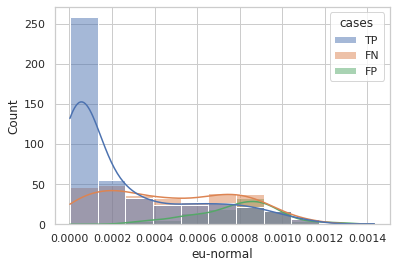

In [14]:
sns.histplot(data = result, x = 'eu-normal', hue = 'cases', kde = True)

In [15]:
len(result['shot'].unique())

190

In [16]:
(result['cases'] == 'TP').sum()

465

In [17]:
len(result['shot'][result['cases'] == 'TP'].unique())

187

In [18]:
(result['cases'] == 'FP').sum()

98

In [19]:
len(result['shot'][result['cases'] == 'FP'].unique())

54

In [20]:
(result['cases'] == 'FN').sum()

296

In [21]:
len(result['shot'][result['cases'] == 'TN'].unique())

0

In [22]:
import matplotlib.pyplot as plt

def plot_output_distribution(pred : np.ndarray):

    preds_disrupt = pred[:,0]
    preds_normal = pred[:,1]
    
    fig, axes = plt.subplots(1,2)
    counts, bins = np.histogram(preds_disrupt.reshape(-1,))
    axes[0].hist(bins[:-1], bins = bins, weights = counts, color = 'gray')
    
    counts, bins = np.histogram(preds_normal.reshape(-1,))
    axes[1].hist(bins[:-1], bins = bins, weights = counts, color = 'gray')
    
    axes[0].set_xlabel("Output(probs)")
    axes[0].set_xlim([0,1.0])
    axes[0].set_ylabel('n-samples')
    axes[0].set_title("Disruption")
    
    axes[1].set_xlabel("Output(probs)")
    axes[1].set_xlim([0,1.0])
    axes[1].set_ylabel('n-samples')
    axes[1].set_title('Normal')
    
    fig.tight_layout()
    
    return fig, axes

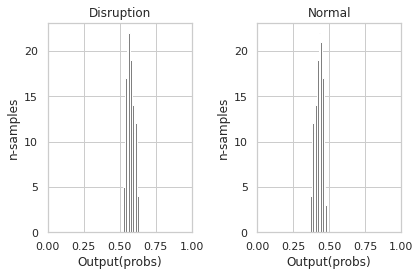

In [23]:
fig, ax = plot_output_distribution(result[result['cases'] == 'TP'].iloc[0]['preds'])

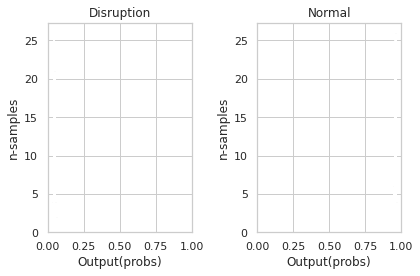

In [24]:
fig, ax = plot_output_distribution(result[result['cases'] == 'FN'].iloc[0]['preds'])

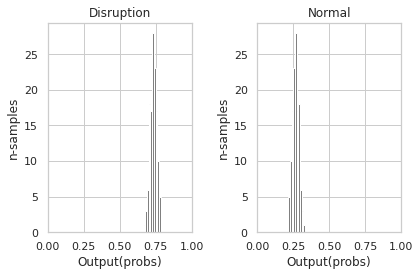

In [25]:
fig, ax = plot_output_distribution(result[result['cases'] == 'FP'].iloc[0]['preds'])

In [26]:
result = pd.read_pickle("./results/analysis_uncertainty_train.pkl")
result['au-disrupt'] = result['au'].apply(lambda x : x[0])
result['eu-disrupt'] = result['eu'].apply(lambda x : x[0])

result['au-normal'] = result['au'].apply(lambda x : x[1])
result['eu-normal'] = result['eu'].apply(lambda x : x[1])
result['cases'] = result['cases'].apply(lambda x : 'FN' if x == 'TN' else x)

<AxesSubplot:xlabel='au-disrupt', ylabel='Count'>

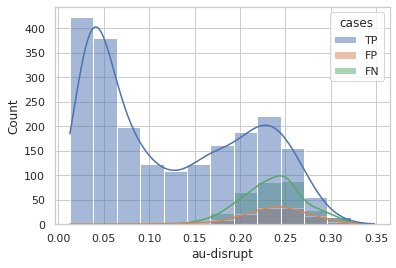

In [27]:
sns.histplot(data = result, x = 'au-disrupt', hue = 'cases', kde = True)

<AxesSubplot:xlabel='eu-disrupt', ylabel='Count'>

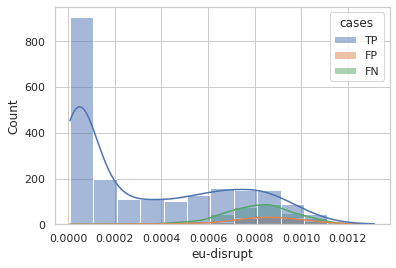

In [28]:
sns.histplot(data = result, x = 'eu-disrupt', hue = 'cases', kde = True)

In [29]:
result = pd.read_pickle("./results/analysis_feature_importance_test.pkl")
result['au-disrupt'] = result['aus'].apply(lambda x : x[0])
result['eu-disrupt'] = result['eus'].apply(lambda x : x[0])

result['au-normal'] = result['aus'].apply(lambda x : x[1])
result['eu-normal'] = result['eus'].apply(lambda x : x[1])
result['cases'] = result['cases'].apply(lambda x : 'FN' if x == 'TN' else x)

In [30]:
result.head()

,cases,shots,aus,eus,preds,q0,q95,ipmhd,kappa,tritop,...,TCI,LV,RC,HA,HEATING,BOL,au-disrupt,eu-disrupt,au-normal,eu-normal
0,TP,25734,"[0.13649434, 0.1650442]","[0.00032280385, 0.0003228037]","[[0.88373613, 0.11626386], [0.84863067, 0.1513...",0.205181,0.198784,0.335973,0.073129,0.131851,...,0.023336,0.014881,0.019190,0.029437,0.075139,0.412205,0.136494,0.000323,0.165044,0.000323
1,TP,21042,"[0.03150916, 0.043210484]","[4.0110754e-05, 4.0110666e-05]","[[0.9471473, 0.052852716], [0.9661456, 0.03385...",0.394106,0.360832,0.483438,0.184331,0.250508,...,0.000000,0.010697,0.008035,0.007394,0.006728,0.029951,0.031509,0.000040,0.043210,0.000040
2,FN,29842,"[0.13799205, 0.15841591]","[0.0004865996, 0.00048659957]","[[0.24311465, 0.75688535], [0.22546445, 0.7745...",0.529763,0.164484,0.204030,0.090926,0.116415,...,0.004349,0.005538,0.005362,0.011630,0.011341,0.093889,0.137992,0.000487,0.158416,0.000487
3,TP,25819,"[0.058861494, 0.057841353]","[9.6802476e-05, 9.6802454e-05]","[[0.9169301, 0.083069935], [0.91366315, 0.0863...",0.484148,0.380264,0.382041,0.040084,0.124642,...,0.008819,0.015747,0.012521,0.011355,0.016406,0.130287,0.058861,0.000097,0.057841,0.000097
4,TP,31491,"[0.038881123, 0.036304206]","[3.382584e-05, 3.3825905e-05]","[[0.96892965, 0.031070385], [0.9608812, 0.0391...",0.161989,0.034496,0.280344,0.043588,0.121524,...,0.075368,0.057419,0.079796,0.109182,0.170077,1.000000,0.038881,0.000034,0.036304,0.000034


In [31]:
col_signals = [
    'q0', 'q95', 'ipmhd', 'kappa', 'tritop', 'tribot', 'betap', 'betan', 'li', 'bcentr', 'rsurf', 
    'aminor','nG', 'ECE', 'LM', 'DL', 'HCM', 'TCI', 'LV', 'RC', 'HA', 'HEATING','BOL'
]

In [32]:
factors = [col_signals[idx] for idx in np.argmax(result[col_signals].values, axis = 1)]
result['main causes'] = factors

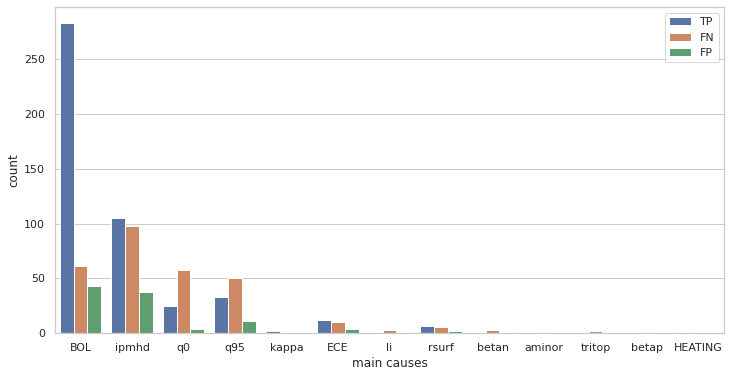

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(data = result, x = "main causes", hue = "cases")
plt.legend(loc = 'upper right')

In [34]:
topk = 5
factors = [
    np.array(col_signals)[np.argpartition(result[col_signals].values[idx,:], kth = -topk)[-topk:]].tolist() for idx in range(result[col_signals].values.shape[0])
]

for k in range(topk):
    result["cause-{:02d}".format(k+1)] = [factor[k] for factor in factors]

<ipython-input-35-a98887a7a900>:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  sns.countplot(x='main causes', hue='cases', data=pd.melt(frame = result, id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)]))


<AxesSubplot:xlabel='main causes', ylabel='count'>

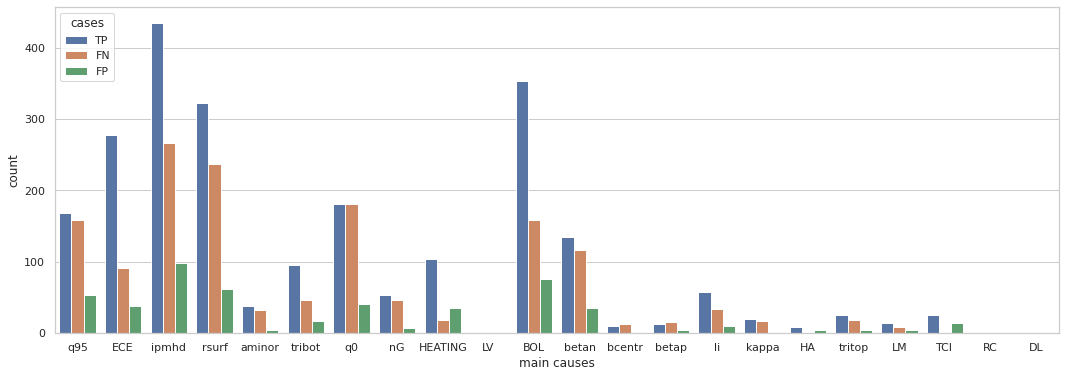

In [35]:
plt.figure(figsize=(18,6))
sns.countplot(x='main causes', hue='cases', data=pd.melt(frame = result, id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)]))

In [36]:
temp = pd.melt(frame = result[result['cases']=='TP'], id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)])
LM_shot = temp[temp['main causes'] == 'LM'].shots.unique()
sorted(LM_shot)

<ipython-input-36-7c3dfc8a8b7d>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  temp = pd.melt(frame = result[result['cases']=='TP'], id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)])


[23033, 23098, 29713, 29760, 29973, 30088, 31326, 31549, 31646]

In [37]:
temp = pd.melt(frame = result, id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)])
LM_shot = temp[temp['main causes'] == 'LM'].shots.unique()
sorted(LM_shot)

<ipython-input-37-5e4a1f41b609>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  temp = pd.melt(frame = result, id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)])


[20948,
 23033,
 23098,
 24960,
 28198,
 29713,
 29760,
 29798,
 29973,
 30088,
 31326,
 31549,
 31646]

<ipython-input-38-0401aa2d5f01>:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  sns.countplot(x='main causes', hue='cases', data=pd.melt(frame = result[result['cases']=='TP'], id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)]))


<AxesSubplot:xlabel='main causes', ylabel='count'>

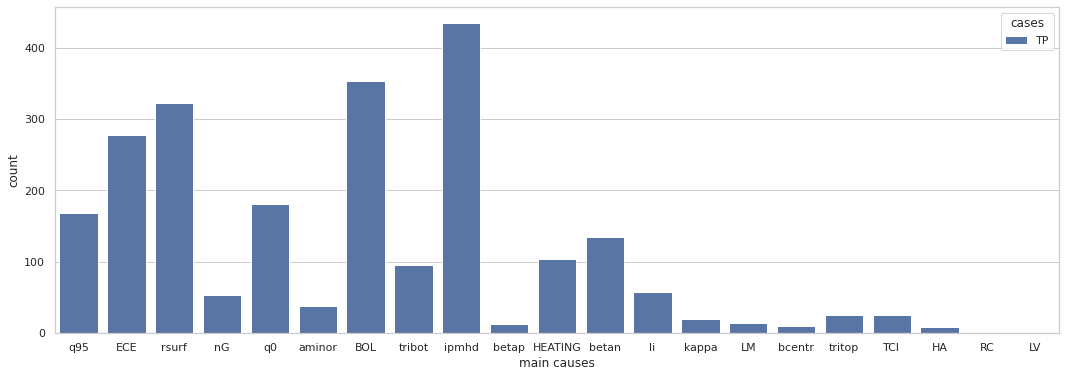

In [38]:
plt.figure(figsize=(18,6))
sns.countplot(x='main causes', hue='cases', data=pd.melt(frame = result[result['cases']=='TP'], id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)]))

<AxesSubplot:xlabel='main causes', ylabel='count'>

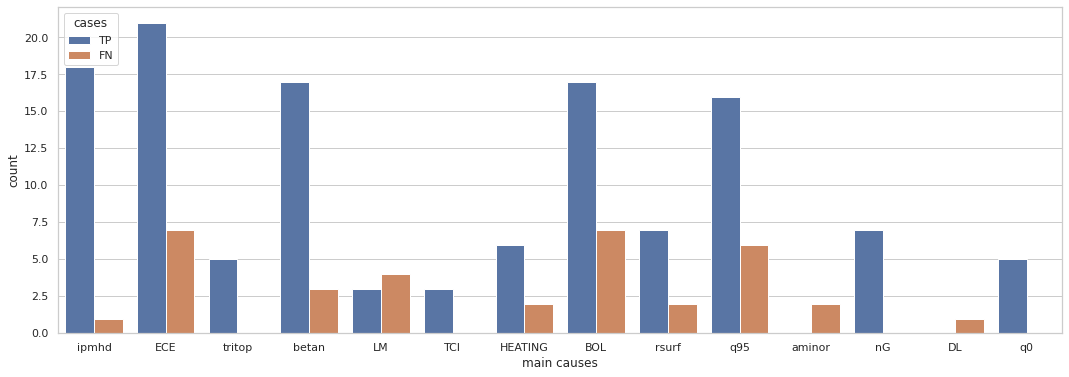

In [39]:
# LM cases detection
result = pd.read_pickle("./results/analysis_feature_importance_lm.pkl")
result['au-disrupt'] = result['aus'].apply(lambda x : x[0])
result['eu-disrupt'] = result['eus'].apply(lambda x : x[0])

result['au-normal'] = result['aus'].apply(lambda x : x[1])
result['eu-normal'] = result['eus'].apply(lambda x : x[1])
result['cases'] = result['cases'].apply(lambda x : 'FN' if x == 'TN' else x)

topk = 5
factors = [
    np.array(col_signals)[np.argpartition(result[col_signals].values[idx,:], kth = -topk)[-topk:]].tolist() for idx in range(result[col_signals].values.shape[0])
]

for k in range(topk):
    result["cause-{:02d}".format(k+1)] = [factor[k] for factor in factors]

plt.figure(figsize=(18,6))
sns.countplot(x='main causes', hue='cases', data=pd.melt(frame = result, id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)]))

<AxesSubplot:xlabel='main causes', ylabel='count'>

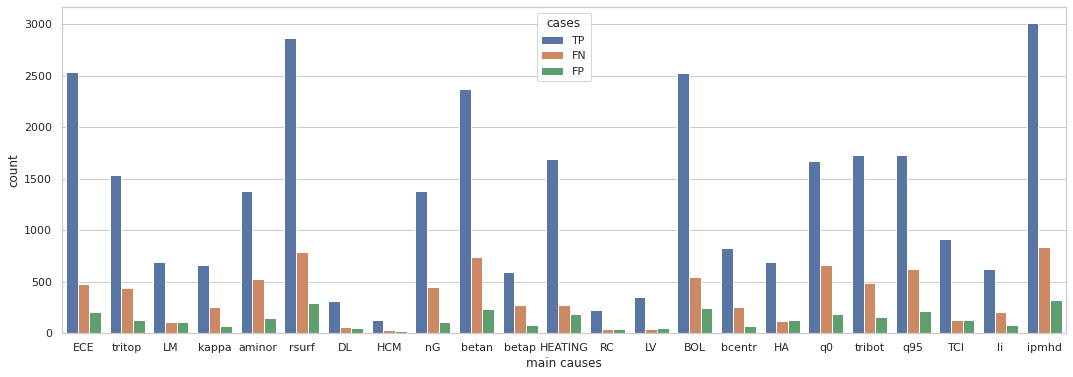

In [40]:
# LM cases detection
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

result = pd.read_pickle("./results/analysis_feature_importance_total.pkl")
result['au-disrupt'] = result['aus'].apply(lambda x : x[0])
result['eu-disrupt'] = result['eus'].apply(lambda x : x[0])

result['au-normal'] = result['aus'].apply(lambda x : x[1])
result['eu-normal'] = result['eus'].apply(lambda x : x[1])
result['cases'] = result['cases'].apply(lambda x : 'FN' if x == 'TN' else x)

col_signals = [
    'q0', 'q95', 'ipmhd', 'kappa', 'tritop', 'tribot', 'betap', 'betan', 'li', 'bcentr', 'rsurf', 
    'aminor','nG', 'ECE', 'LM', 'DL', 'HCM', 'TCI', 'LV', 'RC', 'HA', 'HEATING','BOL'
]

topk = 10
factors = [
    np.array(col_signals)[np.argpartition(result[col_signals].values[idx,:], kth = -topk)[-topk:]].tolist() for idx in range(result[col_signals].values.shape[0])
]

for k in range(topk):
    result["cause-{:02d}".format(k+1)] = [factor[k] for factor in factors]

plt.figure(figsize=(18,6))
sns.countplot(x='main causes', hue='cases', hue_order=['TP','FN','FP'], data=pd.melt(frame = result, id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)]))

In [41]:
len(result.shots.unique())

949

In [42]:
result_topk = pd.melt(frame = result, id_vars=['cases', 'shots'], value_name = 'main causes', value_vars = ["cause-{:02d}".format(k+1) for k in range(topk)])
sorted(result_topk[(result_topk['cases'] == 'TP') & (result_topk['main causes'] == 'LM')].shots.unique())[0:10]

[20830, 20904, 20948, 20949, 20951, 20975, 20977, 20978, 20980, 21031]

In [43]:
result_topk[(result_topk.shots.isin([20941, 20945, 20947, 20948, 20949, 20951, 20975, 20977])) & (result_topk['cases'] == 'TP')  & (result_topk['main causes'] == 'LM')]

,cases,shots,variable,main causes
3808,TP,20949,cause-01,LM
5095,TP,20977,cause-02,LM
5685,TP,20977,cause-02,LM
7174,TP,20977,cause-02,LM
7996,TP,20951,cause-02,LM
8435,TP,20949,cause-03,LM
13022,TP,20948,cause-04,LM
27890,TP,20975,cause-07,LM
28033,TP,20975,cause-07,LM


<AxesSubplot:xlabel='main causes', ylabel='count'>

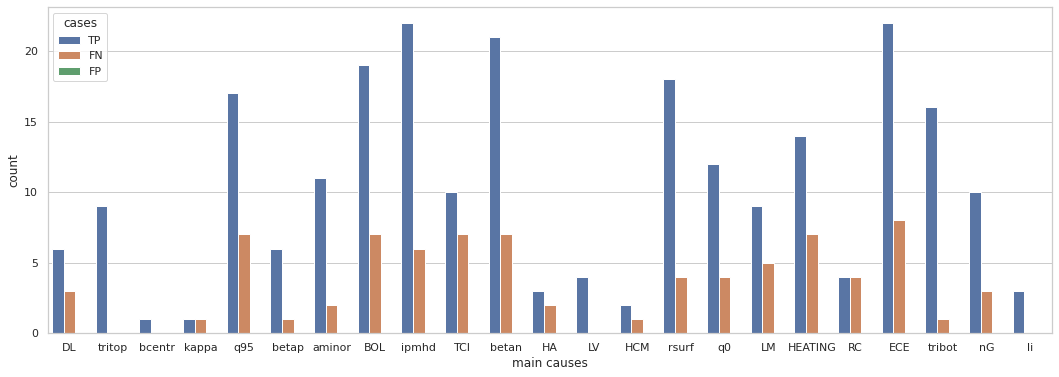

In [44]:
plt.figure(figsize=(18,6))
sns.countplot(
    x='main causes', 
    hue='cases', 
    hue_order=['TP', 'FN','FP'], 
    data= result_topk[(result_topk.shots.isin([20941, 20945, 20947, 20948, 20949, 20951, 20975, 20977]))]
)

### Uncertainty and threshold as hyper-parameters for predicting disruptions

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

result = pd.read_pickle("./results/analysis_feature_importance_test.pkl")
result['au-disrupt'] = result['aus'].apply(lambda x : x[0])
result['eu-disrupt'] = result['eus'].apply(lambda x : x[0])

result['au-normal'] = result['aus'].apply(lambda x : x[1])
result['eu-normal'] = result['eus'].apply(lambda x : x[1])
result['cases'] = result['cases'].apply(lambda x : 'FN' if x == 'TN' else x)

col_signals = [
    'q0', 'q95', 'ipmhd', 'kappa', 'tritop', 'tribot', 'betap', 'betan', 'li', 'bcentr', 'rsurf', 
    'aminor','nG', 'ECE', 'LM', 'DL', 'HCM', 'TCI', 'LV', 'RC', 'HA', 'HEATING','BOL'
]

<AxesSubplot:xlabel='au-disrupt', ylabel='Count'>

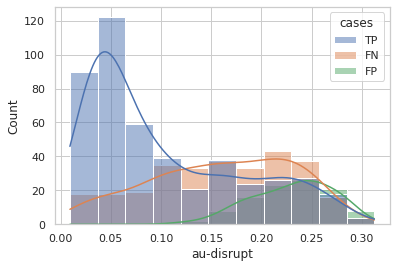

In [46]:
sns.histplot(data = result, x = 'au-disrupt', hue = 'cases', kde = True)

<AxesSubplot:xlabel='eu-disrupt', ylabel='Count'>

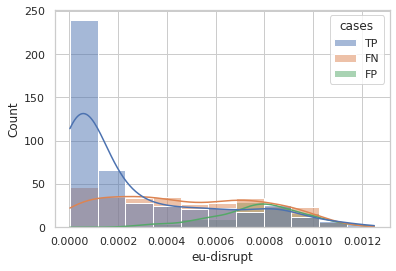

In [47]:
sns.histplot(data = result, x = 'eu-disrupt', hue = 'cases', kde = True)

In [48]:
result_modified = result.copy(deep = True)

In [49]:
result_modified['label'] = result_modified['cases'].apply(lambda x : 0 if x == 'TP' or x == 'FN' else 1)

In [50]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

conf = confusion_matrix(result_modified['label'], result_modified['preds'].apply(lambda x : 0 if x[:, 0].mean() > 0.5 else 1))
lr_pr, lr_rc, _ = precision_recall_curve(result_modified['label'], result_modified['preds'].apply(lambda x : x[:, 0].mean()))

In [51]:
pr = conf[0,0] / (conf[0,0] + conf[1,0])
rc = conf[0,0] / (conf[0,0] + conf[0,1])
f1 = f1_score(result_modified['label'], result_modified['preds'].apply(lambda x : 0 if x[:, 0].mean() > 0.5 else 1), average = "micro")
print("f1 : {}, pr : {}, rc : {}".format(f1, pr, rc))

f1 : 0.5583815028901734, pr : 0.8365896980461812, rc : 0.6189224704336399


In [82]:
from sklearn.metrics import f1_score

prob = result_modified['preds'].apply(lambda x : x[:, 0].mean())
au = result_modified['au-disrupt']
eu = result_modified['eu-disrupt']
label = result_modified['label']

from typing import Optional

def evaluate(prob, au, eu, label, prob_threshold:float, au_threshold:Optional[float], eu_threshold:Optional[float]):
    
    if au_threshold is not None and eu_threshold is not None:
        cond = ((prob > prob_threshold) & (au < au_threshold) & (eu < eu_threshold)) | ((prob <= prob_threshold) & (au >= au_threshold) & (eu >= eu_threshold))
    elif au_threshold is not None and eu_threshold is None:
        cond = ((prob > prob_threshold) & (au < au_threshold)) | ((prob <= prob_threshold) & (au >= au_threshold))
    elif au_threshold is None and eu_threshold is not None:    
        cond = ((prob > prob_threshold) & (eu < eu_threshold)) | ((prob <= prob_threshold) & (eu >= eu_threshold))
    else:
        cond = (prob > prob_threshold)
        
    pred = np.where(cond, 0, 1)
    conf = confusion_matrix(label, pred)
    pr = conf[0,0] / (conf[0,0] + conf[1,0])
    rc = conf[0,0] / (conf[0,0] + conf[0,1])
    f1 = f1_score(label, pred, average = "micro")
    
    return f1, pr, rc, conf

aus = np.array([0.01 * i for i in range(1, 30)])
eus = np.array([0.0001 * i for i in range(1, 12)])
thresholds = np.array([0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95])

f1_mesh = np.zeros((len(aus), len(thresholds)))
pr_mesh = np.zeros((len(aus), len(thresholds)))
rc_mesh = np.zeros((len(aus), len(thresholds)))

for idx_x, au_threshold in enumerate(aus):
    for idx_y, threshold in enumerate(thresholds):
        f1, pr, rc, _ = evaluate(prob, au, eu, label, threshold, au_threshold, None)

        f1_mesh[idx_x, idx_y] = f1
        pr_mesh[idx_x, idx_y] = pr
        rc_mesh[idx_x, idx_y] = rc

In [83]:
orig_f1, orig_pr, orig_rc, orig_conf = evaluate(prob, au, eu, label, 0.5, None, None)

idx_max = np.argmax(f1_mesh.ravel())
max_f1, pr, rc = f1_mesh.ravel()[idx_max], pr_mesh.ravel()[idx_max], rc_mesh.ravel()[idx_max]

print("original - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}".format(orig_f1, orig_pr, orig_rc))
print("maximum - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}".format(max_f1, pr, rc))

original - f1 : 0.558, pr : 0.837, rc : 0.619
maximum - f1 : 0.823, pr : 0.873, rc : 0.936


In [85]:
_, _, _, conf = evaluate(prob, au, eu, label, 0.95, 0.05, None)
conf

array([[712,  49],
       [104,   0]])

In [81]:
result['cases'].unique()

array(['TP', 'FN', 'FP'], dtype=object)

In [65]:
max_au = aus[idx_max // len(thresholds)]
max_thres = thresholds[idx_max % len(thresholds)]

print("threshold : {:.3f}, au-threshold: {:.3f}".format(max_thres, max_au))

threshold : 0.950, au-threshold: 0.050


<ipython-input-55-0fcd8215a1b0>:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, shrink = 0.5, aspect = 5)


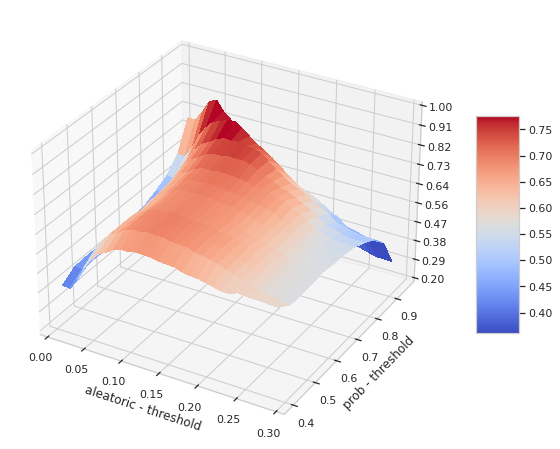

In [55]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

x_mesh, y_mesh = np.meshgrid(aus, thresholds, indexing = 'ij')
fig,ax = plt.subplots(1,1,figsize = (12,8), subplot_kw = {'projection':'3d'})
surf = ax.plot_surface(x_mesh, y_mesh, f1_mesh, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

ax.set_zlim(0.2, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel("aleatoric - threshold")
ax.set_ylabel("prob - threshold")
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()

<ipython-input-56-3a6a67e076c7>:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, shrink = 0.5, aspect = 5)


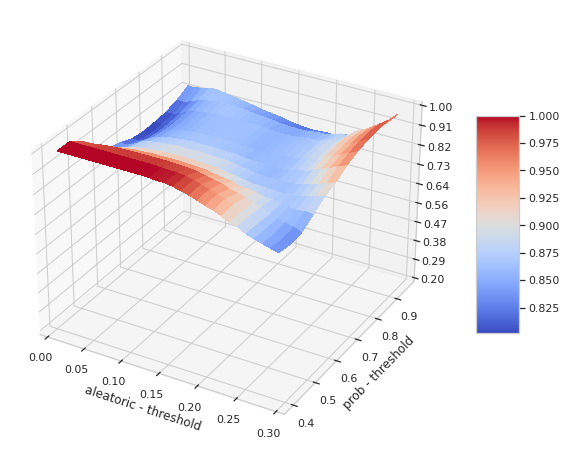

In [56]:
fig, ax = plt.subplots(1,1,figsize = (12,8), subplot_kw = {'projection':'3d'})
surf = ax.plot_surface(x_mesh, y_mesh, pr_mesh, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

ax.set_zlim(0.2, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel("aleatoric - threshold")
ax.set_ylabel("prob - threshold")
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()

<ipython-input-57-137ecaa5575c>:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, shrink = 0.5, aspect = 5)


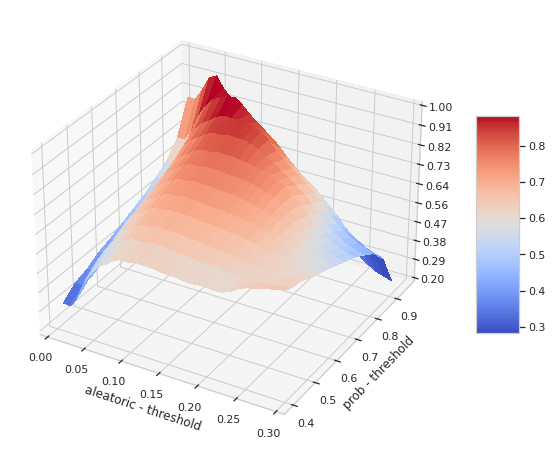

In [57]:
fig, ax = plt.subplots(1,1,figsize = (12,8), subplot_kw = {'projection':'3d'})
surf = ax.plot_surface(x_mesh, y_mesh, rc_mesh, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

ax.set_zlim(0.2, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel("aleatoric - threshold")
ax.set_ylabel("prob - threshold")
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()

In [151]:
import matplotlib.pyplot as plt

col_signals = [
    'q0', 'q95', 'ipmhd', 'kappa', 'tritop', 'tribot', 'betap', 'betan', 'li', 'bcentr', 'rsurf', 
    'aminor','nG', 'ECE', 'LM', 'DL', 'HCM', 'TCI', 'LV', 'RC', 'HA', 'HEATING','BOL'
]

result_10ms = pd.read_pickle("./results/analysis_uncertainty_test_Bayes_TCN_dist_1_Focal_Normal_Robust_TQ_seed_42.pkl")
result_20ms = pd.read_pickle("./results/analysis_uncertainty_test_Bayes_TCN_dist_2_Focal_Normal_Robust_TQ_seed_42.pkl")
result_30ms = pd.read_pickle("./results/analysis_uncertainty_test_Bayes_TCN_dist_3_Focal_Normal_Robust_TQ_seed_42.pkl")
result_40ms = pd.read_pickle("./results/analysis_uncertainty_test_Bayes_TCN_dist_4_Focal_Normal_Robust_TQ_seed_42.pkl")
result_50ms = pd.read_pickle("./results/analysis_uncertainty_test_Bayes_TCN_dist_5_Focal_Normal_Robust_TQ_seed_42.pkl")

result_10ms['preds_diff'] = result_10ms['preds'].apply(lambda x : abs(x[:,0].mean() - x[:,1].mean()))
result_10ms['disrupt'] = result_10ms['preds'].apply(lambda x : x[:,0].mean())
result_10ms['au-disrupt'] = result_10ms['au'].apply(lambda x : x[0])
result_10ms['eu-disrupt'] = result_10ms['eu'].apply(lambda x : x[0])
result_10ms['au-normal'] = result_10ms['au'].apply(lambda x : x[1])
result_10ms['eu-normal'] = result_10ms['eu'].apply(lambda x : x[1])
result_10ms['label'] = result_10ms['cases'].apply(lambda x : 0 if x == 'TP' or x == 'FN' else 1)

result_20ms['preds_diff'] = result_20ms['preds'].apply(lambda x : abs(x[:,0].mean() - x[:,1].mean()))
result_20ms['disrupt'] = result_20ms['preds'].apply(lambda x : x[:,0].mean())
result_20ms['au-disrupt'] = result_20ms['au'].apply(lambda x : x[0])
result_20ms['eu-disrupt'] = result_20ms['eu'].apply(lambda x : x[0])
result_20ms['au-normal'] = result_20ms['au'].apply(lambda x : x[1])
result_20ms['eu-normal'] = result_20ms['eu'].apply(lambda x : x[1])
result_20ms['label'] = result_20ms['cases'].apply(lambda x : 0 if x == 'TP' or x == 'FN' else 1)

result_30ms['preds_diff'] = result_30ms['preds'].apply(lambda x : abs(x[:,0].mean() - x[:,1].mean()))
result_30ms['disrupt'] = result_30ms['preds'].apply(lambda x : x[:,0].mean())
result_30ms['au-disrupt'] = result_30ms['au'].apply(lambda x : x[0])
result_30ms['eu-disrupt'] = result_30ms['eu'].apply(lambda x : x[0])
result_30ms['au-normal'] = result_30ms['au'].apply(lambda x : x[1])
result_30ms['eu-normal'] = result_30ms['eu'].apply(lambda x : x[1])
result_30ms['label'] = result_30ms['cases'].apply(lambda x : 0 if x == 'TP' or x == 'FN' else 1)

result_40ms['preds_diff'] = result_40ms['preds'].apply(lambda x : abs(x[:,0].mean() - x[:,1].mean()))
result_40ms['disrupt'] = result_40ms['preds'].apply(lambda x : x[:,0].mean())
result_40ms['au-disrupt'] = result_40ms['au'].apply(lambda x : x[0])
result_40ms['eu-disrupt'] = result_40ms['eu'].apply(lambda x : x[0])
result_40ms['au-normal'] = result_40ms['au'].apply(lambda x : x[1])
result_40ms['eu-normal'] = result_40ms['eu'].apply(lambda x : x[1])
result_40ms['label'] = result_40ms['cases'].apply(lambda x : 0 if x == 'TP' or x == 'FN' else 1)

result_50ms['preds_diff'] = result_50ms['preds'].apply(lambda x : abs(x[:,0].mean() - x[:,1].mean()))
result_50ms['disrupt'] = result_50ms['preds'].apply(lambda x : x[:,0].mean())
result_50ms['au-disrupt'] = result_50ms['au'].apply(lambda x : x[0])
result_50ms['eu-disrupt'] = result_50ms['eu'].apply(lambda x : x[0])
result_50ms['au-normal'] = result_50ms['au'].apply(lambda x : x[1])
result_50ms['eu-normal'] = result_50ms['eu'].apply(lambda x : x[1])
result_50ms['label'] = result_50ms['cases'].apply(lambda x : 0 if x == 'TP' or x == 'FN' else 1)

<AxesSubplot:xlabel='preds_diff', ylabel='Count'>

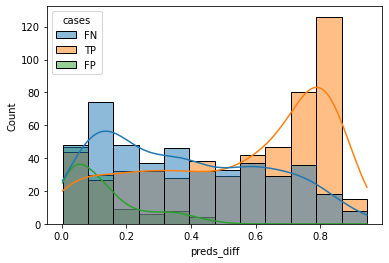

In [114]:
sns.histplot(data = result_50ms[result_50ms['cases']!='TN'], x = 'preds_diff', hue = 'cases', kde = True)

<AxesSubplot:xlabel='au-disrupt', ylabel='Count'>

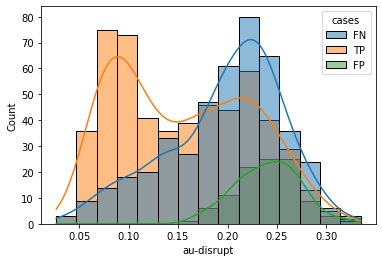

In [118]:
sns.histplot(data = result_50ms[result_50ms['cases']!='TN'], x = 'au-disrupt', hue = 'cases', kde = True)

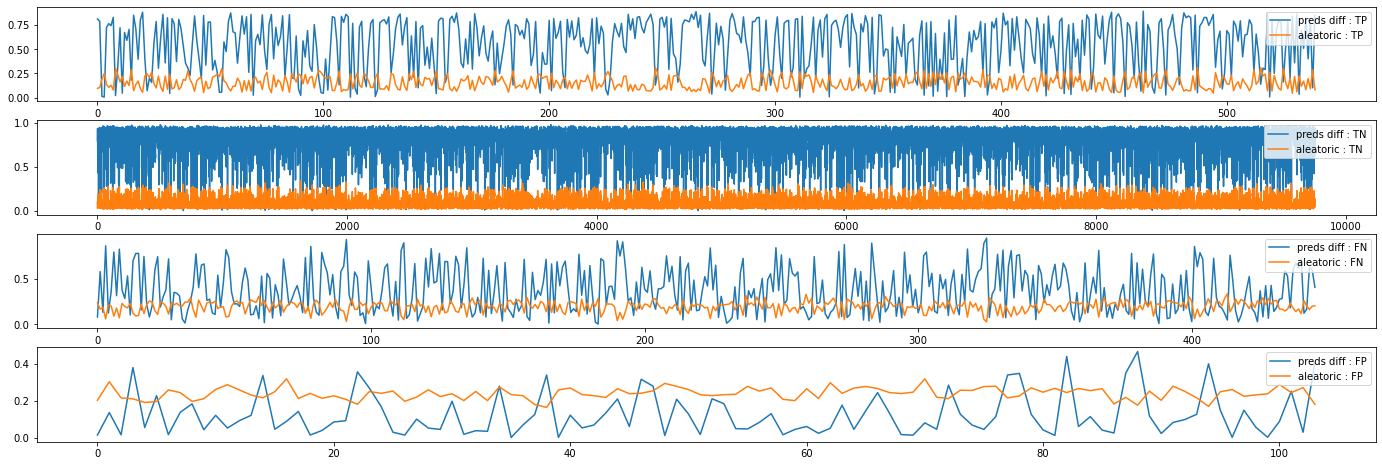

In [136]:
fig, axes = plt.subplots(4,1, figsize = (24,8))

for idx, case in enumerate(['TP', 'TN', 'FN', 'FP']):
    df = result_50ms[result_50ms['cases'] == case]
    ax = axes.ravel()[idx]
    ax.plot(df['preds_diff'].values, label = 'preds diff : {}'.format(case))
    ax.plot(df['au-disrupt'].values, label = 'aleatoric : {}'.format(case))
    ax.legend(loc = 'upper right')

<AxesSubplot:xlabel='preds_diff', ylabel='au-disrupt'>

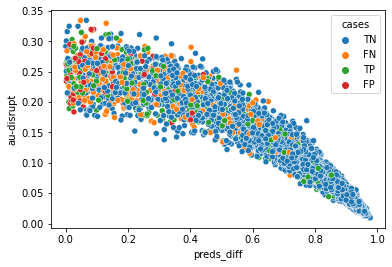

In [152]:
sns.scatterplot(x = 'preds_diff', y = 'au-disrupt', data = result_50ms, hue = 'cases')

(0.0, 1.0)

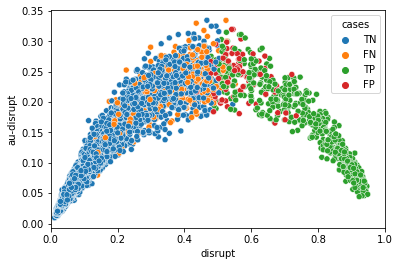

In [166]:
sns.scatterplot(x = 'disrupt', y = 'au-disrupt', data = result_50ms, hue = 'cases')
plt.xlim([0,1.0])

(0.0, 1.0)

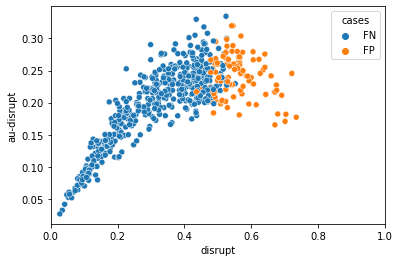

In [167]:
sns.scatterplot(x = 'disrupt', y = 'au-disrupt', data = result_50ms[result_50ms['cases'].isin(['FP', 'FN'])], hue = 'cases')
plt.xlim([0,1.0])

(0.0, 1.0)

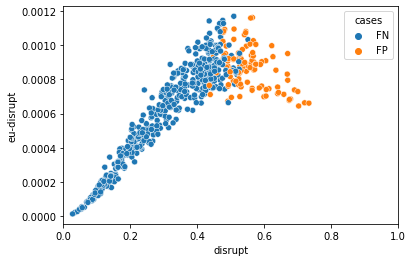

In [170]:
sns.scatterplot(x = 'disrupt', y = 'eu-disrupt', data = result_50ms[result_50ms['cases'].isin(['FP', 'FN'])], hue = 'cases')
plt.xlim([0,1.0])

<AxesSubplot:xlabel='preds_diff', ylabel='au-disrupt'>

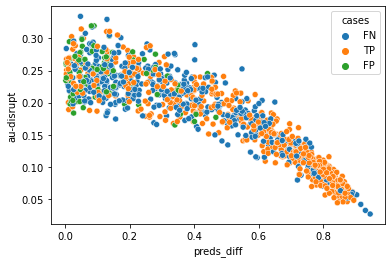

In [147]:
sns.scatterplot(x = 'preds_diff', y = 'au-disrupt', data = result_50ms[result_50ms['cases'] != 'TN'], hue = 'cases')

<AxesSubplot:xlabel='preds_diff', ylabel='au-disrupt'>

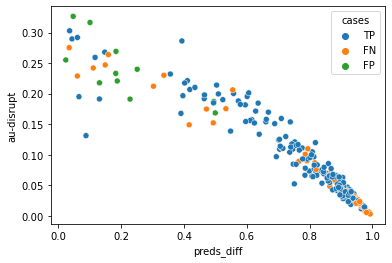

In [141]:
sns.scatterplot(x = 'preds_diff', y = 'au-disrupt', data = result_10ms[result_10ms['cases'] != 'TN'], hue = 'cases')

<AxesSubplot:xlabel='preds_diff', ylabel='au-disrupt'>

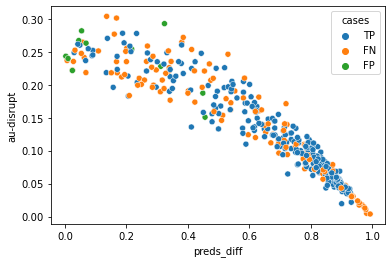

In [142]:
sns.scatterplot(x = 'preds_diff', y = 'au-disrupt', data = result_20ms[result_20ms['cases'] != 'TN'], hue = 'cases')

<AxesSubplot:xlabel='preds_diff', ylabel='au-disrupt'>

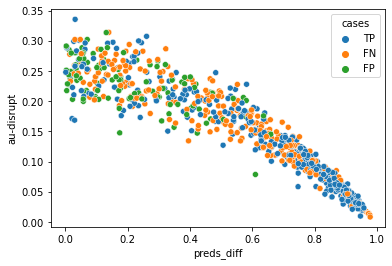

In [143]:
sns.scatterplot(x = 'preds_diff', y = 'au-disrupt', data = result_40ms[result_40ms['cases'] != 'TN'], hue = 'cases')

In [175]:
from sklearn.metrics import f1_score, confusion_matrix
from typing import Optional

def evaluate(prob, au, eu, label, prob_threshold:float, au_threshold:Optional[float], eu_threshold:Optional[float] = None, diff_threshold : Optional[float] = None):
    
    prob_diff = (2 * prob - 1).abs()
    cond_diff = ((prob > prob_threshold) & prob_diff > diff_threshold) if diff_threshold else 0
    
    if au_threshold is not None and eu_threshold is not None:
        cond = ((prob > prob_threshold) & (au < au_threshold) & (eu < eu_threshold)) | ((prob <= prob_threshold) & (au >= au_threshold) & (eu >= eu_threshold)) | cond_diff 
    elif au_threshold is not None and eu_threshold is None:
        cond = ((prob > prob_threshold) & (au < au_threshold)) | ((prob <= prob_threshold) & (au >= au_threshold)) | cond_diff 
    elif au_threshold is None and eu_threshold is not None:    
        cond = ((prob > prob_threshold) & (eu < eu_threshold)) | ((prob <= prob_threshold) & (eu >= eu_threshold)) | cond_diff 
    else:
        cond = (prob > prob_threshold) | cond_diff
        
    pred = np.where(cond, 0, 1)
    conf = confusion_matrix(label, pred)
    
    if conf[0,0] + conf[1,0] == 0:
        pr = 0
    else:
        pr = conf[0,0] / (conf[0,0] + conf[1,0])
        
    if conf[0,0] + conf[0,1] == 0:
        rc = 0
    else:
        rc = conf[0,0] / (conf[0,0] + conf[0,1])
    
    if pr == 0 and rc == 0:
        f1 = 0
    else:
        f1 = 2 * (pr * rc) / (pr + rc)
    
    return f1, pr, rc, conf

In [176]:
aus = np.array([0.01 * i for i in range(1, 50)])
eus = np.array([0.0001 * i for i in range(1, 20)])
thresholds = np.array([0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95])

In [181]:
# TQ 10 ms with Bayesian
prob = result_10ms['preds'].apply(lambda x : x[:,0].mean())
au = result_10ms['au-disrupt']
eu = result_10ms['eu-disrupt']
label = result_10ms['label']

f1_mesh = np.zeros((len(aus), len(thresholds)))
pr_mesh = np.zeros((len(aus), len(thresholds)))
rc_mesh = np.zeros((len(aus), len(thresholds)))

for idx_x, au_threshold in enumerate(aus):
    for idx_y, threshold in enumerate(thresholds):
        f1, pr, rc, _ = evaluate(prob, au, eu, label, threshold, au_threshold, None, None)

        f1_mesh[idx_x, idx_y] = f1
        pr_mesh[idx_x, idx_y] = pr
        rc_mesh[idx_x, idx_y] = rc

orig_f1, orig_pr, orig_rc, orig_conf = evaluate(prob, au, eu, label, 0.5, None, None, None)
idx_max = np.argmax(f1_mesh.ravel())
max_f1, pr, rc = f1_mesh.ravel()[idx_max], pr_mesh.ravel()[idx_max], rc_mesh.ravel()[idx_max]

print("original - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}".format(orig_f1, orig_pr, orig_rc))
print("maximum - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}".format(max_f1, pr, rc))

max_au = aus[idx_max // len(thresholds)]
max_thres = thresholds[idx_max % len(thresholds)]

print("threshold : {:.3f}, au-threshold: {:.3f}".format(max_thres, max_au))

original - f1 : 0.846, pr : 0.940, rc : 0.769
maximum - f1 : 0.859, pr : 0.951, rc : 0.782
threshold : 0.450, au-threshold: 0.310


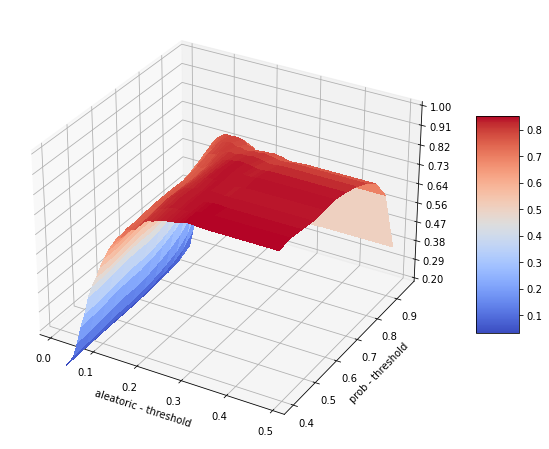

In [182]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

x_mesh, y_mesh = np.meshgrid(aus, thresholds, indexing = 'ij')
fig,ax = plt.subplots(1,1,figsize = (12,8), subplot_kw = {'projection':'3d'})
surf = ax.plot_surface(x_mesh, y_mesh, f1_mesh, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

ax.set_zlim(0.2, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel("aleatoric - threshold")
ax.set_ylabel("prob - threshold")
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()

<AxesSubplot:xlabel='au-disrupt', ylabel='Count'>

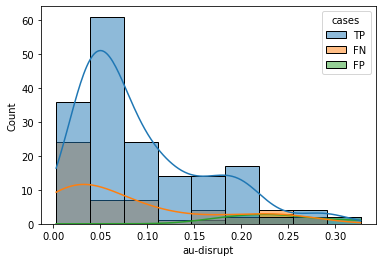

In [93]:
sns.histplot(data = result_10ms[result_10ms['cases']!='TN'], x = 'au-disrupt', hue = 'cases', kde = True)

<AxesSubplot:xlabel='au-disrupt', ylabel='Count'>

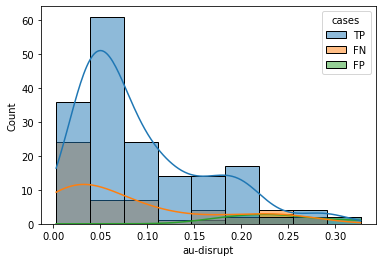

In [94]:
sns.histplot(data = result_10ms[result_10ms['cases']!='TN'], x = 'au-disrupt', hue = 'cases', kde = True)

In [183]:
# TQ 20 ms with Bayesian
prob = result_20ms['preds'].apply(lambda x : x[:,0].mean())
au = result_20ms['au-disrupt']
eu = result_20ms['eu-disrupt']
label = result_20ms['label']

f1_mesh = np.zeros((len(aus), len(thresholds)))
pr_mesh = np.zeros((len(aus), len(thresholds)))
rc_mesh = np.zeros((len(aus), len(thresholds)))

for idx_x, au_threshold in enumerate(aus):
    for idx_y, threshold in enumerate(thresholds):
        f1, pr, rc, _ = evaluate(prob, au, eu, label, threshold, au_threshold, None)

        f1_mesh[idx_x, idx_y] = f1
        pr_mesh[idx_x, idx_y] = pr
        rc_mesh[idx_x, idx_y] = rc

orig_f1, orig_pr, orig_rc, orig_conf = evaluate(prob, au, eu, label, 0.5, None, None)
idx_max = np.argmax(f1_mesh.ravel())
max_f1, pr, rc = f1_mesh.ravel()[idx_max], pr_mesh.ravel()[idx_max], rc_mesh.ravel()[idx_max]

print("original - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}".format(orig_f1, orig_pr, orig_rc))
print("maximum - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}".format(max_f1, pr, rc))

max_au = aus[idx_max // len(thresholds)]
max_thres = thresholds[idx_max % len(thresholds)]

print("threshold : {:.3f}, au-threshold: {:.3f}".format(max_thres, max_au))

original - f1 : 0.793, pr : 0.953, rc : 0.679
maximum - f1 : 0.794, pr : 0.910, rc : 0.705
threshold : 0.450, au-threshold: 0.280


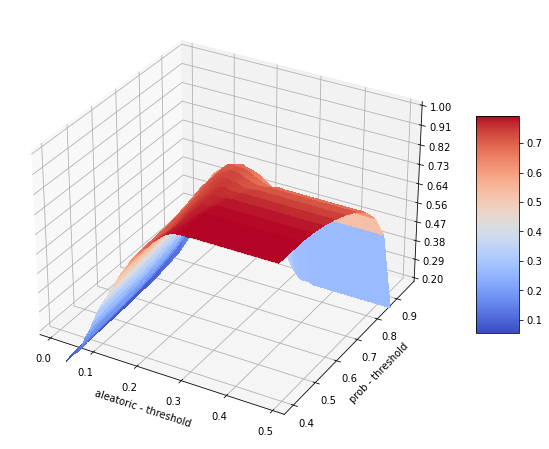

In [184]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

x_mesh, y_mesh = np.meshgrid(aus, thresholds, indexing = 'ij')
fig,ax = plt.subplots(1,1,figsize = (12,8), subplot_kw = {'projection':'3d'})
surf = ax.plot_surface(x_mesh, y_mesh, f1_mesh, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

ax.set_zlim(0.2, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel("aleatoric - threshold")
ax.set_ylabel("prob - threshold")
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()

In [99]:
# TQ 30 ms with Bayesian
prob = result_30ms['preds'].apply(lambda x : x[:,0].mean())
au = result_30ms['au-disrupt']
eu = result_30ms['eu-disrupt']
label = result_30ms['label']

f1_mesh = np.zeros((len(aus), len(thresholds)))
pr_mesh = np.zeros((len(aus), len(thresholds)))
rc_mesh = np.zeros((len(aus), len(thresholds)))

for idx_x, au_threshold in enumerate(aus):
    for idx_y, threshold in enumerate(thresholds):
        f1, pr, rc, _ = evaluate(prob, au, eu, label, threshold, au_threshold, None)

        f1_mesh[idx_x, idx_y] = f1
        pr_mesh[idx_x, idx_y] = pr
        rc_mesh[idx_x, idx_y] = rc

orig_f1, orig_pr, orig_rc, orig_conf = evaluate(prob, au, eu, label, 0.5, None, None)
idx_max = np.argmax(f1_mesh.ravel())
max_f1, pr, rc = f1_mesh.ravel()[idx_max], pr_mesh.ravel()[idx_max], rc_mesh.ravel()[idx_max]

print("original - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}".format(orig_f1, orig_pr, orig_rc))
print("maximum - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}".format(max_f1, pr, rc))

max_au = aus[idx_max // len(thresholds)]
max_thres = thresholds[idx_max % len(thresholds)]

print("threshold : {:.3f}, au-threshold: {:.3f}".format(max_thres, max_au))

original - f1 : 0.709, pr : 0.797, rc : 0.638
maximum - f1 : 0.733, pr : 0.817, rc : 0.664
threshold : 0.650, au-threshold: 0.250


<AxesSubplot:xlabel='au-disrupt', ylabel='Count'>

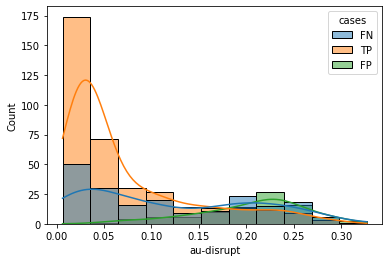

In [100]:
sns.histplot(data = result_30ms[result_30ms['cases']!='TN'], x = 'au-disrupt', hue = 'cases', kde = True)

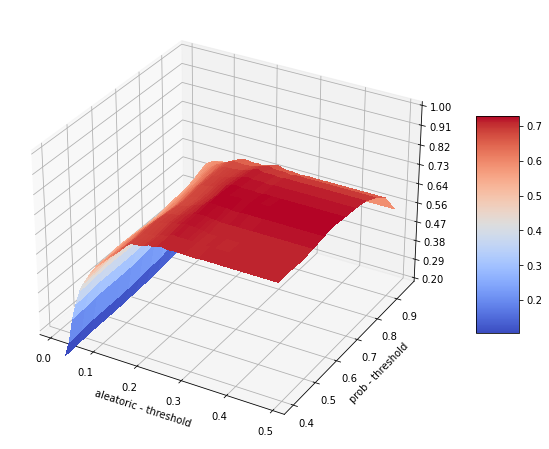

In [101]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

x_mesh, y_mesh = np.meshgrid(aus, thresholds, indexing = 'ij')
fig,ax = plt.subplots(1,1,figsize = (12,8), subplot_kw = {'projection':'3d'})
surf = ax.plot_surface(x_mesh, y_mesh, f1_mesh, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

ax.set_zlim(0.2, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel("aleatoric - threshold")
ax.set_ylabel("prob - threshold")
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()

In [186]:
# TQ 40 ms with Bayesian
prob = result_40ms['preds'].apply(lambda x : x[:,0].mean())
au = result_40ms['au-disrupt']
eu = result_40ms['eu-disrupt']
label = result_40ms['label']

f1_mesh = np.zeros((len(aus), len(thresholds)))
pr_mesh = np.zeros((len(aus), len(thresholds)))
rc_mesh = np.zeros((len(aus), len(thresholds)))

for idx_x, au_threshold in enumerate(aus):
    for idx_y, threshold in enumerate(thresholds):
        f1, pr, rc, _ = evaluate(prob, au, eu, label, threshold, au_threshold, None)

        f1_mesh[idx_x, idx_y] = f1
        pr_mesh[idx_x, idx_y] = pr
        rc_mesh[idx_x, idx_y] = rc

orig_f1, orig_pr, orig_rc, orig_conf = evaluate(prob, au, eu, label, 0.5, None, None)
idx_max = np.argmax(f1_mesh.ravel())
max_f1, pr, rc = f1_mesh.ravel()[idx_max], pr_mesh.ravel()[idx_max], rc_mesh.ravel()[idx_max]

print("original - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}".format(orig_f1, orig_pr, orig_rc))
print("maximum - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}".format(max_f1, pr, rc))

max_au = aus[idx_max // len(thresholds)]
max_thres = thresholds[idx_max % len(thresholds)]

print("threshold : {:.3f}, au-threshold: {:.3f}".format(max_thres, max_au))

original - f1 : 0.707, pr : 0.827, rc : 0.618
maximum - f1 : 0.707, pr : 0.827, rc : 0.618
threshold : 0.500, au-threshold: 0.340


In [227]:
f1, pr, rc, conf = evaluate(prob, au, eu, label, 0.5, None, None, 0.55)
print("f1 : ", f1)
print("pr : ", pr)
print('rc : ', rc)

f1 :  0.7072987208427389
pr :  0.8274647887323944
rc :  0.6176084099868594


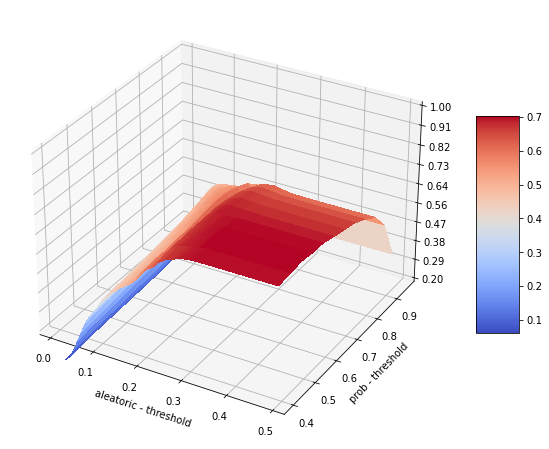

In [103]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

x_mesh, y_mesh = np.meshgrid(aus, thresholds, indexing = 'ij')
fig,ax = plt.subplots(1,1,figsize = (12,8), subplot_kw = {'projection':'3d'})
surf = ax.plot_surface(x_mesh, y_mesh, f1_mesh, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

ax.set_zlim(0.2, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel("aleatoric - threshold")
ax.set_ylabel("prob - threshold")
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()

In [104]:
# TQ 50 ms with Bayesian
prob = result_50ms['preds'].apply(lambda x : x[:,0].mean())
au = result_50ms['au-disrupt']
eu = result_50ms['eu-disrupt']
label = result_50ms['label']

f1_mesh = np.zeros((len(aus), len(thresholds)))
pr_mesh = np.zeros((len(aus), len(thresholds)))
rc_mesh = np.zeros((len(aus), len(thresholds)))

for idx_x, au_threshold in enumerate(aus):
    for idx_y, threshold in enumerate(thresholds):
        f1, pr, rc, _ = evaluate(prob, au, eu, label, threshold, au_threshold, None)

        f1_mesh[idx_x, idx_y] = f1
        pr_mesh[idx_x, idx_y] = pr
        rc_mesh[idx_x, idx_y] = rc

orig_f1, orig_pr, orig_rc, orig_conf = evaluate(prob, au, eu, label, 0.5, None, None)
idx_max = np.argmax(f1_mesh.ravel())
max_f1, pr, rc = f1_mesh.ravel()[idx_max], pr_mesh.ravel()[idx_max], rc_mesh.ravel()[idx_max]

print("original - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}".format(orig_f1, orig_pr, orig_rc))
print("maximum - f1 : {:.3f}, pr : {:.3f}, rc : {:.3f}".format(max_f1, pr, rc))

max_au = aus[idx_max // len(thresholds)]
max_thres = thresholds[idx_max % len(thresholds)]

print("threshold : {:.3f}, au-threshold: {:.3f}".format(max_thres, max_au))

original - f1 : 0.670, pr : 0.852, rc : 0.553
maximum - f1 : 0.685, pr : 0.674, rc : 0.697
threshold : 0.400, au-threshold: 0.340


<AxesSubplot:xlabel='au-disrupt', ylabel='Count'>

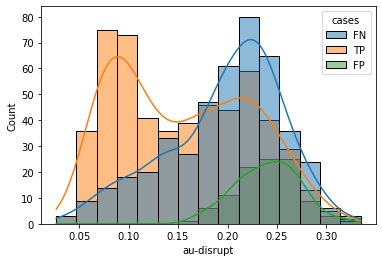

In [105]:
sns.histplot(data = result_50ms[result_50ms['cases']!='TN'], x = 'au-disrupt', hue = 'cases', kde = True)

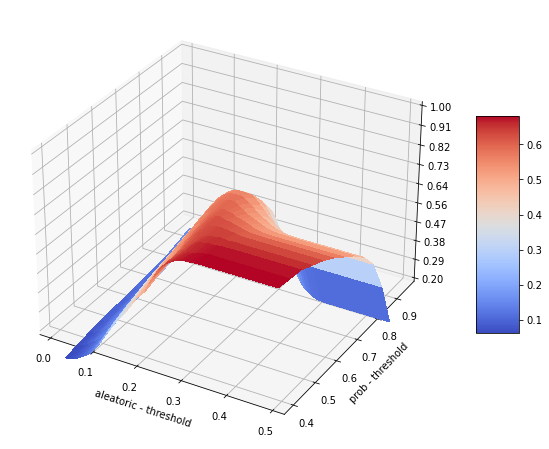

In [106]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

x_mesh, y_mesh = np.meshgrid(aus, thresholds, indexing = 'ij')
fig,ax = plt.subplots(1,1,figsize = (12,8), subplot_kw = {'projection':'3d'})
surf = ax.plot_surface(x_mesh, y_mesh, f1_mesh, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

ax.set_zlim(0.2, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel("aleatoric - threshold")
ax.set_ylabel("prob - threshold")
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.show()